## Analyzing job description corpus using Naive Bayes

# Part A (basic text mining)

A1. What are the top 5 parts of speech in this corpus of job descriptions? How frequently do they appear?

Solution:

Reading the training data and selecting random 10,000 data points.

In [3]:
import pandas as pd
from nltk.corpus import brown
import nltk

desc = pd.read_csv('Train_rev1.csv', dtype= 'unicode')
rev_data = desc.sample(random_state = 100,n=10000)

Tokenizing each row in the column 'FullDescription' and couting parts of speech

In [4]:
from collections import Counter
def poscount(s):
    return Counter([j for i,j in nltk.pos_tag(nltk.word_tokenize(s))])

rev_data['tt']=rev_data['FullDescription'].apply(poscount)

Accumulating all the counts from every row into a single dictionary

In [5]:
result={}
def accumulate(dict):
    for key, value in dict.items():
        if key in result.keys():
            result[key] +=value
        else:
            result[key] = value

rev_data['tt'].map(accumulate)
result

{'$': 212,
 "''": 342,
 '(': 9508,
 ')': 9779,
 ',': 95655,
 '.': 91103,
 ':': 22473,
 'CC': 128478,
 'CD': 17716,
 'DT': 203554,
 'EX': 1041,
 'FW': 1286,
 'IN': 262161,
 'JJ': 219119,
 'JJR': 3179,
 'JJS': 4534,
 'MD': 41145,
 'NN': 462903,
 'NNP': 347999,
 'NNPS': 5633,
 'NNS': 179319,
 'PDT': 476,
 'POS': 3142,
 'PRP': 49296,
 'PRP$': 30398,
 'RB': 57829,
 'RBR': 929,
 'RBS': 854,
 'RP': 3589,
 'TO': 82660,
 'UH': 72,
 'VB': 129105,
 'VBD': 12370,
 'VBG': 84236,
 'VBN': 47459,
 'VBP': 46417,
 'VBZ': 41501,
 'WDT': 5722,
 'WP': 5806,
 'WP$': 84,
 'WRB': 3471,
 '``': 16}

Selecting the 5 most common parts of speech based on frequency

In [6]:
from operator import itemgetter
sorted(result.items(), key=itemgetter(1), reverse=True)[:5]

[('NN', 462903),
 ('NNP', 347999),
 ('IN', 262161),
 ('JJ', 219119),
 ('DT', 203554)]

Answer A1) The top 5 parts of speech are  
Common noun  
Proper noun  
Preposition or conjuction  
Adjective  
Determiner  

A2. Does this corpus support Zipf’s law? Plot the most common 100 words in the corpus against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

Solution:  
Counting the frequency of each word in every row. Without removing stopwords or lemmatizing

In [7]:
from collections import Counter
def wordcount(s):
    return Counter([i for i in nltk.word_tokenize(s)])

rev_data['wt']=rev_data['FullDescription'].apply(wordcount)
rev_data['wt']

190731    {'A': 2, 'Marketing': 2, 'Executive': 1, 'is':...
88950     {'The': 4, 'Senior': 1, 'Analyst': 2, 'is': 3,...
51163     {'Lead': 6, 'Java': 4, 'Developer': 6, 'Front'...
155224    {'Fixed': 1, 'term': 1, 'for': 1, '12': 1, 'mo...
61106     {'We': 1, 'are': 3, 'currently': 1, 'recruitin...
607       {'Just': 2, 'Social': 4, 'Care': 3, 'are': 2, ...
45539     {'Graduate': 2, 'Developer': 2, 'Software': 1,...
118084    {'My': 1, 'client': 3, 'are': 1, 'currently': ...
170393    {'Theatre': 2, 'Technician': 5, '(': 1, 'Costu...
71489     {'Compiler': 4, 'Developer': 1, 'London': 1, '...
146463    {'Our': 1, 'client': 1, 'a': 4, 'leading': 1, ...
137799    {'Convergence/Mobile': 3, 'Working/M2M': 3, 'S...
92460     {'UCL': 5, 'Development': 3, 'and': 19, 'Alumn...
3073      {'Care': 4, 'Assistants': 2, 'required': 3, 't...
28699     {'A': 1, 'successful': 1, 'branch': 1, 'of': 5...
89421     {'36': 1, 'hours': 1, 'per': 1, 'week': 1, ','...
201109    {'Internal': 3, 'Sales': 7, 'E

Accumulating all the frequencies in a single dictionary with words as key and frequency as values

In [8]:
resultword={}
def accumulateword(dict):
    for key, value in dict.items():
        if key in resultword.keys():
            resultword[key] +=value
        else:
            resultword[key] = value

rev_data['wt'].map(accumulateword)
resultword

{'A': 3869,
 'Marketing': 1010,
 'Executive': 1099,
 'is': 24309,
 'required': 5145,
 'to': 77163,
 'join': 3723,
 'a': 58072,
 'global': 1064,
 'value': 645,
 'added': 76,
 'distributor': 44,
 'of': 58745,
 'unified': 9,
 'communications': 532,
 'currently': 2131,
 'based': 4050,
 'in': 40411,
 'Burgess': 14,
 'Hill': 47,
 '.': 87762,
 'You': 8687,
 'will': 26820,
 'have': 13945,
 'the': 72241,
 'responsibility': 1060,
 'for': 33760,
 'day': 1709,
 'marketing': 1603,
 'within': 8756,
 'department': 889,
 'as': 17090,
 'defined': 302,
 'by': 4487,
 'activities': 1097,
 'below': 363,
 'This': 9053,
 'role': 10530,
 'an': 17004,
 'integral': 135,
 'member': 453,
 'small': 707,
 'but': 2019,
 'busy': 860,
 'team': 9641,
 'Key': 1331,
 'attributes': 146,
 'be': 24846,
 'proactively': 172,
 'engaged': 52,
 'with': 29088,
 'GTM': 3,
 'and': 108353,
 'business': 8159,
 'touchpoints': 1,
 'that': 8360,
 'works': 365,
 'internally': 149,
 'vendors': 101,
 'customers': 2356,
 'when': 992,
 'The'

Selecting top 100 common words based on frequency

In [9]:
from operator import itemgetter
topword = sorted(resultword.items(), key=itemgetter(1), reverse=True)[:100]
topword

[('and', 108353),
 (',', 95655),
 ('.', 87762),
 ('to', 77163),
 ('the', 72241),
 ('of', 58745),
 ('a', 58072),
 ('in', 40411),
 ('for', 33760),
 ('with', 29088),
 ('will', 26820),
 ('be', 24846),
 ('is', 24309),
 ('you', 19402),
 ('****', 19249),
 (':', 17832),
 ('as', 17090),
 ('an', 17004),
 ('are', 16856),
 ('on', 15859),
 ('have', 13945),
 ('experience', 13535),
 ('The', 12766),
 ('or', 12670),
 ('this', 11040),
 ('role', 10530),
 ('work', 10487),
 ('your', 10210),
 (')', 9777),
 ('team', 9641),
 ('(', 9506),
 ('This', 9053),
 ('within', 8756),
 ('You', 8687),
 ('all', 8415),
 ('that', 8360),
 ('skills', 8266),
 ('business', 8159),
 ('working', 7513),
 ('their', 7400),
 ('client', 7018),
 ('at', 6728),
 ('our', 6600),
 ('from', 6550),
 ('Manager', 6266),
 ('looking', 6219),
 ('/', 5777),
 ('company', 5776),
 ('management', 5639),
 ('To', 5496),
 ('development', 5255),
 ('opportunity', 5180),
 ('required', 5145),
 ('sales', 5038),
 ('we', 4891),
 ('new', 4889),
 ('support', 4865),


Converting the dictionary to a dataframe. 

In [10]:
keys_freq = []
values_freq = []
xaxis = range(len(topword))
for key, value in topword:
    keys_freq.append(key)
    values_freq.append(value)

In [11]:
df = pd.DataFrame({'col1word':keys_freq, 'count':values_freq})
df['Rank'] = df['count'].rank(ascending=False)
df['RF'] = df['Rank']*df['count']
df

,col1word,count,Rank,RF
0,and,108353,1.0,108353.0
1,",",95655,2.0,191310.0
2,.,87762,3.0,263286.0
3,to,77163,4.0,308652.0
4,the,72241,5.0,361205.0
5,of,58745,6.0,352470.0
6,a,58072,7.0,406504.0
7,in,40411,8.0,323288.0
8,for,33760,9.0,303840.0
9,with,29088,10.0,290880.0


Plotting log-log graph of frequency against rank

Populating the interactive namespace from numpy and matplotlib


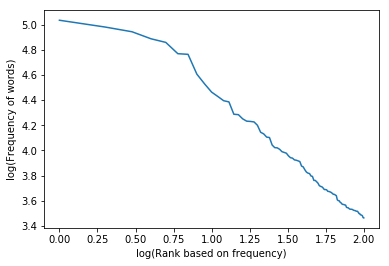

In [12]:
import numpy
from matplotlib import pyplot as plt
%pylab inline
import math
logA = numpy.log10(df['count'])
logB = numpy.log10(df['Rank'])
plt.plot(logB, logA)
plt.ylabel('log(Frequency of words)')
plt.xlabel('log(Rank based on frequency)')

The corpus supports Zipf's law. For rank around 1-10, the value of k differs from the vlaue of k after rank 10

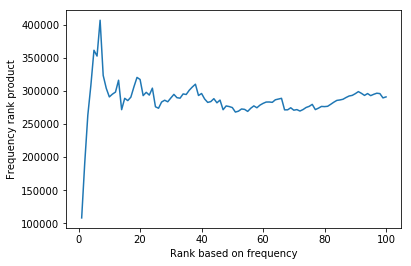

In [13]:
logA = numpy.log10(df['count'])
logB = numpy.log10(df['Rank'])
plt.plot(df['Rank'], df['RF'])
plt.ylabel('Frequency rank product')
plt.xlabel('Rank based on frequency')

While plotting rank against the product of rank and frequency by putting k as 1, we see that the graph is straight after rank 10. So the value of k for ranks below 10 are different.

A3. If we remove stopwords and lemmatize the corpus, what are the 10 most common words? What are their frequencies?

Solution:  
Removing stop words and lemmatizing the corpus

In [15]:
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus=[]
def tokenizes(item):
    stop = stopwords.words('english') + list(string.punctuation)
    text = [i for i in nltk.word_tokenize(item.lower()) if i not in stop]
    lem = list(map(lemmatizer.lemmatize, text))
    corpus.append(lem)
rev_data["FullDescription"].apply(tokenizes)
rev_data["Description_corpus_stoplem"]=corpus
rev_data["Description_corpus_stoplem"]=rev_data["Description_corpus_stoplem"].astype(str)

Counting the frequency of each word in each row

In [16]:
from collections import Counter
def wordcount(s):
    return Counter([i for i in nltk.word_tokenize(s)])

rev_data['stoplem']=rev_data['Description_corpus_stoplem'].apply(wordcount)
rev_data['stoplem']

190731    {'[': 1, ''marketing': 14, ''': 269, ',': 271,...
88950     {'[': 1, ''senior': 1, ''': 380, ',': 379, ''a...
51163     {'[': 1, ''lead': 7, ''': 228, ',': 227, ''jav...
155224    {'[': 1, ''fixed': 1, ''': 152, ',': 150, ''te...
61106     {'[': 1, ''currently': 1, ''': 295, ',': 293, ...
607       {'[': 1, ''social': 4, ''': 118, ',': 116, ''c...
45539     {'[': 1, ''graduate': 4, ''': 136, ',': 135, '...
118084    {'[': 1, ''client': 4, ''': 174, ',': 173, ''c...
170393    {'[': 1, ''theatre': 3, ''': 184, ',': 183, ''...
71489     {'[': 1, ''compiler': 10, ''': 122, ',': 121, ...
146463    {'[': 1, ''client': 1, ''': 62, ',': 61, ''lea...
137799    {'[': 1, ''convergence/mobile': 3, ''': 264, '...
92460     {'[': 1, ''ucl': 5, ''': 139, ',': 138, ''deve...
3073      {'[': 1, ''care': 7, ''': 110, ',': 108, ''ass...
28699     {'[': 1, ''successful': 1, ''': 79, ',': 78, '...
89421     {'[': 1, ''36': 1, ''': 87, ',': 86, ''hour': ...
201109    {'[': 1, ''internal': 5, ''': 

In [17]:
resultword={}
def accumulatelem(dict):
    for key, value in dict.items():
        if key in resultword.keys():
            resultword[key] +=value
        else:
            resultword[key] = value

rev_data['stoplem'].map(accumulatelem)
resultword

{'[': 10000,
 "'marketing": 2631,
 "'": 1553487,
 ',': 1545339,
 "'executive": 1563,
 "'required": 5693,
 "'join": 3804,
 "'global": 1438,
 "'value": 893,
 "'added": 87,
 "'distributor": 113,
 "'unified": 32,
 "'communication": 3336,
 "'currently": 2208,
 "'based": 4495,
 "'burgess": 14,
 "'hill": 56,
 "'responsibility": 3053,
 "'day": 3744,
 "'within": 8886,
 "'department": 1602,
 "'defined": 306,
 "'activity": 1644,
 "'role": 12758,
 "'integral": 135,
 "'member": 1317,
 "'small": 746,
 "'busy": 873,
 "'team": 12349,
 "'key": 3445,
 "'attribute": 231,
 "'proactively": 259,
 "'engaged": 53,
 "'gtm": 3,
 "'business": 11362,
 "'touchpoints": 2,
 "'work": 12106,
 "'internally": 150,
 "'vendor": 253,
 "'customer": 7100,
 "'ideal": 1442,
 "'candidate": 7291,
 "'enjoy": 447,
 "'working": 9125,
 "'across": 2592,
 "'broad": 293,
 "'mix": 149,
 "'involved": 743,
 "'planning": 1425,
 "'execution": 206,
 "'follows": 89,
 "'include": 2484,
 "'event": 676,
 "'proactive": 620,
 "'measuring": 48,
 "'

Selecting 10 most common words

In [18]:
from operator import itemgetter
topword = sorted(resultword.items(), key=itemgetter(1), reverse=True)[:10]
topword

[("'", 1553487),
 (',', 1545339),
 ("'****", 19252),
 ("'experience", 17553),
 ("'role", 12758),
 ("'team", 12349),
 ("'work", 12106),
 ("'client", 11603),
 ("'business", 11362),
 ("'service", 10220)]

# Part B

In [19]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
min_data = rev_data['SalaryNormalized'].astype(int).quantile(.75)
rev_data['Salary_rank_75'] = rev_data['SalaryNormalized'].astype(int) >= min_data
rev_data['Salary_rank_not_75']= rev_data['SalaryNormalized'].astype(int) <= min_data
rev_data = rev_data[['FullDescription','Salary_rank_75','Salary_rank_not_75']]
rev_train = rev_data[:9000]
rev_test = rev_data[9001:]

# B1

Create a classification model with all words and the bag-of-words approach. How accurate is the model (show the confusion matrix)? 

## Bag of Words

Calculate frequency of each word occurence and use multinomial Naive Bayes to train the model

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(rev_train['FullDescription'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train_tfidf,rev_train['Salary_rank_75'])

In [22]:
X_test_counts = count_vect.transform(rev_test['FullDescription'])
X_new_tfidf = tfidf_transformer.transform(X_test_counts)
predicted = classifier.predict(X_new_tfidf)
rev_test['predicted_output'] = predicted

C:\Users\Monika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
pd.crosstab(rev_test['Salary_rank_75'], rev_test['predicted_output'])

predicted_output,False,True
Salary_rank_75,,
False,756,2
True,237,4


This shows an accuracy of 76%

## All words

In [24]:
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.tokenize import word_tokenize

In [25]:
### All words
labels = rev_data.FullDescription.apply(word_tokenize).to_frame()
labels['category'] = rev_data['Salary_rank_75']

Create document with description and corresponding category together in a list

In [26]:
d = [(list(labels['FullDescription'].iloc[i]),labels['category'].iloc[i]) for i in range(0,len(labels))]
random.shuffle(d)

Calculate word features based on their frequency distance and select top 1000 words

In [27]:
from itertools import chain
word_features = nltk.FreqDist(chain(*[i for i,j in d]))
word_features_rev = list(word_features)[:1000]
numtrain = int(len(d) * 90 / 100)

In [28]:
train_set = [({i:(i in tokens) for i in word_features_rev}, tag) for tokens,tag in d[:numtrain]]

In [29]:
test_set = [({i:(i in tokens) for i in word_features_rev}, tag) for tokens,tag in d[numtrain:]]

Run binomial Naive Bayes to train the model

In [30]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [31]:
print(nltk.classify.accuracy(classifier, test_set))

0.742


In [33]:
classifier.show_most_informative_features(5)

Most Informative Features
               classroom = True            False : True   =     15.4 : 1.0
                    Park = True            False : True   =     11.7 : 1.0
                evenings = True            False : True   =     11.3 : 1.0
                 teacher = True            False : True   =      8.6 : 1.0
                  Subsea = True             True : False  =      8.5 : 1.0


In [34]:
test_result = []
gold_result = []
for i in range(len(test_set)):
    test_result.append(classifier.classify(test_set[i][0]))
    gold_result.append(test_set[i][1])
cm = nltk.ConfusionMatrix(gold_result, test_result)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

      |      F        |
      |      a      T |
      |      l      r |
      |      s      u |
      |      e      e |
------+---------------+
False | <56.7%> 15.7% |
 True |  10.1% <17.5%>|
------+---------------+
(row = reference; col = test)



## B2

Speculate before running the following analysis whether lemmatization would help improve the accuracy of classification. Now create a classification model after lemmatization. Did the classification accuracy increase relative to B1? Comment on your speculation versus the actual results you obtained. 

Lemmatization should help improve accuracy of classifier since it groups all words together on basis of their root words. Hence a lot of similar words should be associated with each other making it easier to classify them in test dataset

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

Create a function to convert descriptions to work tokens and then lemmatize them

In [36]:
corpus=[]
def tokenizelem(item):
    text = word_tokenize(item.lower())
    lem = list(map(lemmatizer.lemmatize, text))
    corpus.append(lem)

rev_data["FullDescription"].apply(tokenizelem)
rev_data["Description_corpus"]=corpus
rev_data["Description_corpus"]=rev_data["Description_corpus"].astype(str)

In [38]:
rev_train = rev_data[:9000]
rev_test = rev_data[9001:]

Run a multinomial naive bayes on word tokens obtained after lemmatization

In [39]:
X_train_counts_lem = count_vect.fit_transform(rev_train['Description_corpus'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf_lem = tfidf_transformer.fit_transform(X_train_counts_lem)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train_tfidf_lem,rev_train['Salary_rank_75'])

In [40]:
X_test_counts_lem = count_vect.transform(rev_test['Description_corpus'])
X_new_tfidf_lem = tfidf_transformer.transform(X_test_counts_lem)
predicted = classifier.predict(X_new_tfidf_lem)
rev_test['predicted_output'] = predicted

C:\Users\Monika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
pd.crosstab(rev_test['Salary_rank_75'], rev_test['predicted_output'])

predicted_output,False,True
Salary_rank_75,,
False,757,1
True,236,5


The accuracy is 76.2% here. This shows lemmatization has not significantly improved accuracy here

## B3

Now speculate whether stopwords removal from the original data would help increase the accuracy of the model. Take out the stopwords (but do not lemmatize), build a classification model and check the accuracy, and compare with that in B1 & B2.   

If lemmatization did not improve accuracy, we believe even stopwords won't be useful for improving accuracy because the word associations would still remain the same

In [42]:
from nltk.corpus import stopwords
import string

Create function to tokenize word descriptions and remove all stopwords

In [43]:
corpus=[]
def tokenizestop(item):
    stop = stopwords.words('english') + list(string.punctuation)
    text = [i for i in word_tokenize(item.lower()) if i not in stop]
    corpus.append(text)

rev_data["FullDescription"].apply(tokenizestop)
rev_data["Description_corpus_stop"]=corpus
rev_data["Description_corpus_stop"]=rev_data["Description_corpus_stop"].astype(str)

In [45]:
rev_train = rev_data[:9000]
rev_test = rev_data[9001:]

In [46]:
X_train_counts_stop = count_vect.fit_transform(rev_train['Description_corpus_stop'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf_stop = tfidf_transformer.fit_transform(X_train_counts_stop)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train_tfidf_stop,rev_train['Salary_rank_75'])

In [47]:
X_test_counts_stop = count_vect.transform(rev_test['Description_corpus_stop'])
X_test_counts_stop = tfidf_transformer.transform(X_test_counts_stop)
predicted = classifier.predict(X_test_counts_stop)
rev_test['predicted_output'] = predicted

C:\Users\Monika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [48]:
pd.crosstab(rev_test['Salary_rank_75'], rev_test['predicted_output'])

predicted_output,False,True
Salary_rank_75,,
False,756,2
True,232,9


The accuracy has increased to 76.5%. Still its approximately the same. Here lemmatization and removal of stopwords has not lead to improved accuracy

In [49]:
from operator import itemgetter
N = 10
vocabulary = np.array([t for t, i in sorted(count_vect.vocabulary_.items(), key=itemgetter(1))])

topN = np.argsort(classifier.coef_[0])[-10:]
vocabulary[topN]

array(['client', 'within', 'role', 'manager', 'development', 'team',
       'project', 'management', 'experience', 'business'], 
      dtype='<U94')

**These are the top 10 words for highest earners** 

In [50]:
corpus2=[]
def tokenizestop(item):
    stop = stopwords.words('english') + list(string.punctuation)
    text = [i for i in word_tokenize(item.lower()) if i not in stop]
    corpus2.append(text)

rev_data["FullDescription"].apply(tokenizestop)
rev_data["Description_corpus_stop2"]=corpus2
rev_data["Description_corpus_stop2"]=rev_data["Description_corpus_stop2"].astype(str)

In [52]:
rev_train = rev_data[:9000]
rev_test = rev_data[9001:]

In [53]:
X_train_counts_stop = count_vect.fit_transform(rev_train['Description_corpus_stop2'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf_stop = tfidf_transformer.fit_transform(X_train_counts_stop)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train_tfidf_stop,rev_train['Salary_rank_not_75'])

In [54]:
X_test_counts_stop = count_vect.transform(rev_test['Description_corpus_stop2'])
X_test_counts_stop = tfidf_transformer.transform(X_test_counts_stop)
predicted = classifier.predict(X_test_counts_stop)
rev_test['predicted_output'] = predicted

C:\Users\Monika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [55]:
from operator import itemgetter
N = 10
vocabulary = np.array([t for t, i in sorted(count_vect.vocabulary_.items(), key=itemgetter(1))])

topN = np.argsort(classifier.coef_[0])[-10:]
vocabulary[topN]

array(['within', 'working', 'manager', 'skills', 'business', 'team',
       'role', 'work', 'experience', 'sales'], 
      dtype='<U94')

**These are the top 10 words for lowest earners**

## B4

In [56]:
count_vect = CountVectorizer(ngram_range=(1,2))
X_train_counts = count_vect.fit_transform(rev_train['FullDescription'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train_tfidf,rev_train['Salary_rank_75'])

In [57]:
X_test_counts = count_vect.transform(rev_test['FullDescription'])
X_new_tfidf = tfidf_transformer.transform(X_test_counts)
predicted = classifier.predict(X_new_tfidf)
rev_test['predicted_output'] = predicted

C:\Users\Monika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
pd.crosstab(rev_test['Salary_rank_75'], rev_test['predicted_output'])

predicted_output,False
Salary_rank_75,
False,758
True,241


**The accuracy decreases to 75.87% when we include the bigrams. Now, the decrease in accuracy is just 0.83% which isn't much, but we hoped that the accuracy should have increased when we included the bigrams (before running our script)**